# Predicting Employee Productivity

We plan on utilizing this dataset, transforming the productivity range (0-1) into different classes.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Exploratory Data Analysis

Let's get a better grasp of what exactly the dataset entails. As per the official documentation, the columns of the dataset:
- `date`: date in MM-DD-YYYY
- `quarter` : a portion of the month — month was divided into four quarters
- `department`: associated department with the instance
- `day`: day of the week
- `team`: associated team number with the instance
- `targeted_productivity`: targeted productivity set by the authority for each team for each day
- `smv`: standard minute value — the allocated time for a task
- `wip`: work in progress — includes the number of unfinished items for products
- `over_time`: represents the amount of overtime by each team in minutes
- `incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
- `idle_time`: the duration of time when the production was interrupted due to several reasons
- `idle_men`: the number of workers who were idle due to production interruption
- `no_of_style_change`: number of changes in the style of a particular product
- `no_of_workers`: number of workers on each team
- `actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

In [32]:
#shape of the dataset
print(f'Rows in dataset:',df.shape[0])
print(f'Columns in dataset:',df.shape[1])

Rows in dataset: 1197
Columns in dataset: 15


In [33]:
#information of columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [34]:
#basic statistics of dataset
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


 - `date`
     -should change its object type to datetime 
- `quarter`
    - could be changed from `object` (string) to an integer  
- `day`
     - could be changed from `object` (string) to an integer 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 - `wip`
     - has over 500 null values
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64

In [35]:
df[['idle_time', 'idle_men']].value_counts()

idle_time  idle_men
0.0        0           1179
2.0        10             2
3.5        15             2
8.0        35             2
3.5        20             1
4.0        20             1
           40             1
4.5        25             1
           30             1
5.0        20             1
           30             1
6.5        30             1
90.0       10             1
150.0      15             1
270.0      45             1
300.0      37             1
dtype: int64

In [36]:
df[df['idle_time'] == 270.0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
650,2/7/2015,Quarter1,sweing,Saturday,7,0.7,24.26,658.0,6960,0,270.0,45,0,58.0,0.66227


In [37]:
df['idle_time'].value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

In [38]:
df['idle_men'].value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

In [39]:
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


<AxesSubplot:>

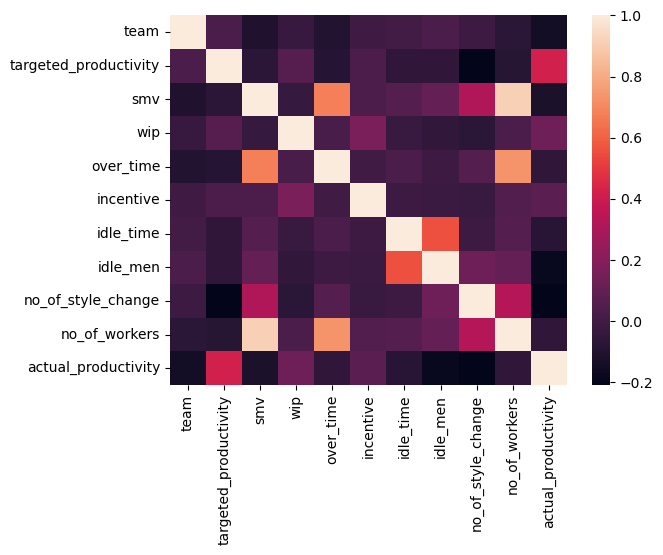

In [44]:
sns.heatmap(df.corr())